# Numerical Transformation

Preparing data for machine learning often requires numerical transformation. This process adjusts the scale or distribution of numerical data, helping models like logistic regression and neural networks better compare features and improve accuracy.

In [40]:
import pandas as pd

coffee = pd.read_csv("../../assets/csv/starbucks_customers.csv")
print(coffee.columns)
coffee.info

Index(['spent', 'nearest_starbucks', 'age', 'rate_quality', 'rate_price',
       'rate_promo', 'ambiance', 'wifi', 'service', 'meetings_hangout'],
      dtype='object')


<bound method DataFrame.info of      spent  nearest_starbucks  age  rate_quality  rate_price  rate_promo  \
0       13                  8   52             4           4           4   
1       25                  8   35             4           5           5   
2       10                  8   29             2           1           5   
3        7                  8   28             4           1           4   
4       10                  8   28             4           2           4   
..     ...                ...  ...           ...         ...         ...   
117      5                  0   22             3           4           5   
118     16                  0   22             4           3           5   
119      2                  0   20             4           3           5   
120     19                  0   20             4           4           4   
121      3                  0   14             3           3           3   

     ambiance  wifi  service  meetings_hangout  
0     

## Centering Your Data

Centering data means subtracting the mean from each data point, making the new mean 0. This helps visualize how far each data point is from the mean.


Minimum age: 13
Maximum age: 70
Range of ages: 57
Mean of ages: 27.33606557377049
Centered ages: 0      24.663934
1       7.663934
2       1.663934
3       0.663934
4       0.663934
         ...    
117    -5.336066
118    -5.336066
119    -7.336066
120    -7.336066
121   -13.336066
Name: age, Length: 122, dtype: float64


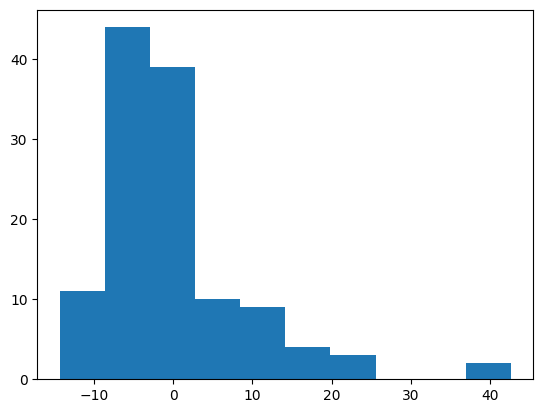

In [41]:
import numpy as np
import matplotlib.pyplot as plt 

# create ages variable
ages = coffee['age']

# get min and print
min_age = np.min(ages)
print("Minimum age:", min_age)

# get max and print
max_age = np.max(ages)
print("Maximum age:", max_age)

# print the range
print("Range of ages:", max_age - min_age)

# find the mean
mean_age = np.mean(ages)
print("Mean of ages:", mean_age)

# center ages
centered_ages = ages - mean_age
print("Centered ages:", centered_ages)

# graph it
plt.hist(centered_ages)
plt.show()

## Standardizing Our Data

Standardization, or Z-Score normalization, involves centering data and then dividing by the standard deviation, resulting in a mean of zero and a standard deviation of one. This ensures all features are on the same scale, which is crucial for models that treat features equally, such as PCA, clustering algorithms, KNN, and regularization methods like LASSO and Ridge.

$$
\displaystyle z = \frac{value - mean}{stdev}
$$


In [42]:
std_dev_age = np.std(ages)

# standardize ages
ages_standardized = (ages - mean_age) / std_dev_age

# print the results
print(np.mean(ages_standardized))
print(np.std(ages_standardized))

1.7290358580227847e-16
0.9999999999999999


### Standardizing Our Data with Sklearn

Now that we know the theory behind standardization, we can use `StandardScaler` from sklearn to automate this process. First, we reshape our data into one column using `.reshape(-1,1)` before applying the scaler. This ensures our data has a mean of 0 and a standard deviation of 1, just like in the manual method.


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# reshape
ages_reshaped = np.array(ages).reshape(-1,1)

# fit_transform
ages_scaled = scaler.fit_transform(ages_reshaped)

## print mean and std
print(np.mean(ages_scaled))
print(np.std(ages_scaled))

1.7290358580227847e-16
0.9999999999999999


## Min-Max Normalization
Min-max normalization scales data by setting the minimum value to 0 and the maximum to 1, with all other values transformed to fall between 0 and 1. This method works well when the data range isn’t too large, but it's not ideal for datasets with extreme outliers. It ensures that all features are on the same scale, just like standardization.

$$
\displaystyle X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

In [44]:
## get spent feature
spent = coffee["spent"]

#find the max spent
max_spent = np.max(spent)

#find the min spent
min_spent = np.min(spent)

#find the difference
spent_range = max_spent - min_spent
print("Spent range:", spent_range)

#normalize your spent feature
spent_normalized = (spent - min_spent) / (max_spent - min_spent)
print("Spent normalized:", spent_normalized)

Spent range: 28
Spent normalized: 0      0.464286
1      0.892857
2      0.357143
3      0.250000
4      0.357143
         ...   
117    0.178571
118    0.571429
119    0.071429
120    0.678571
121    0.107143
Name: spent, Length: 122, dtype: float64


### Min-Max Normalization with Sklearn

To implement min-max normalization using `MinMaxScaler` from sklearn, we reshape the data into one column and apply the scaler. This will transform all values to a range between 0 and 1, just as we did manually earlier.

In [45]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

#reshape our array to prepare it for the mmscaler
spent_reshaped = np.array(spent).reshape(-1,1)

#.fit_transform our reshaped data
reshaped_scaled = mmscaler.fit_transform(spent_reshaped)

# print min and max
print(np.min(reshaped_scaled))
print(np.max(reshaped_scaled))



0.0
1.0


## Binning Our Data

Binning is the process of grouping data into categories or ranges. It helps capture patterns in noisy data by balancing the size of bins to avoid losing important details. For example, we can bin the "ages of Starbucks customeres" feature into specific ranges to observe patterns. Using `pd.cut()`, we create bins and visualize the distribution to gain insights.

13
70
0    [40, 71)
1    [30, 40)
2    [20, 30)
3    [20, 30)
4    [20, 30)
5    [20, 30)
6    [20, 30)
7    [20, 30)
8    [20, 30)
9    [20, 30)
Name: binned_ages, dtype: category
Categories (4, interval[int64, left]): [[12, 20) < [20, 30) < [30, 40) < [40, 71)]


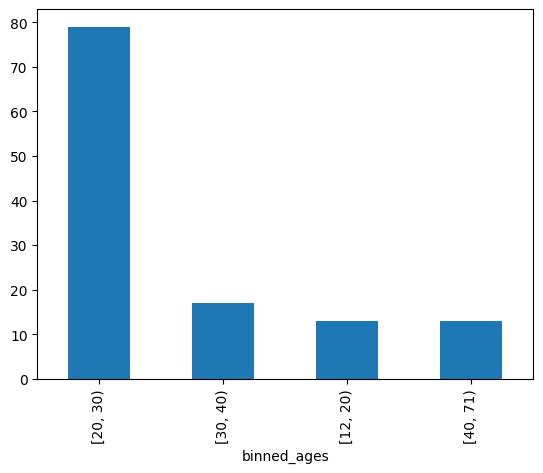

In [46]:
print(np.min(ages))
print(np.max(ages))

## set bins
age_bins = [12, 20, 30, 40, 71]

## new column
coffee['binned_ages'] = pd.cut(ages, age_bins, right = False)

## print first 10 rows
print(coffee['binned_ages'].head(10))

## graph it
coffee['binned_ages'].value_counts().plot(kind='bar')
plt.show()

## Natural Log Transformation

Log transformations are useful for right-skewed data and large outliers, helping the data resemble a normal distribution and reducing the range of values. This transformation is effective for improving model performance by compressing large differences in values. However, avoid using it on negative or left-skewed data, as it's not suitable for those cases.

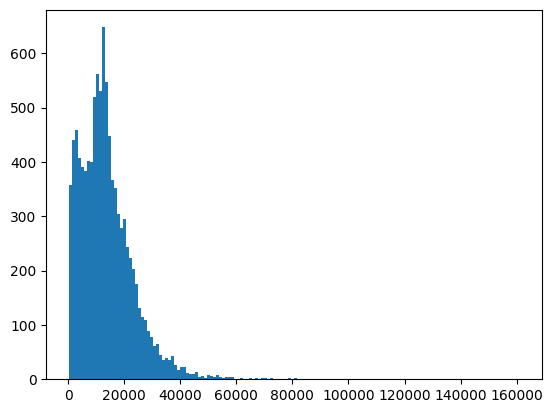

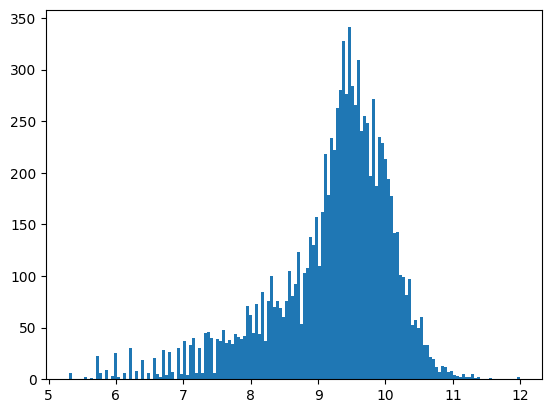

In [47]:
## read in csv file
cars = pd.read_csv('../../assets/csv/cars.csv')

## set you price variable
prices = cars['sellingprice']

## plot a histogram of prices
plt.hist(prices, bins = 150)
plt.show();

## log transform prices
log_prices = np.log(prices)

## plot a histogram of log_prices
plt.hist(log_prices, bins = 150)
plt.show();